# using deep neural network

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

/home/rj/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
assert(X_train.shape[0] == y_train.shape[0]),"the no of images and labels are not equal"
assert(X_test.shape[0] == y_test.shape[0]),"the no of images and labels are not equal"
assert(X_train.shape[1:] == (28,28)),"the dimensions of image are not 28*28"
assert(X_train.shape[1:] == (28,28)),"the dimensions of image are not 28*28"


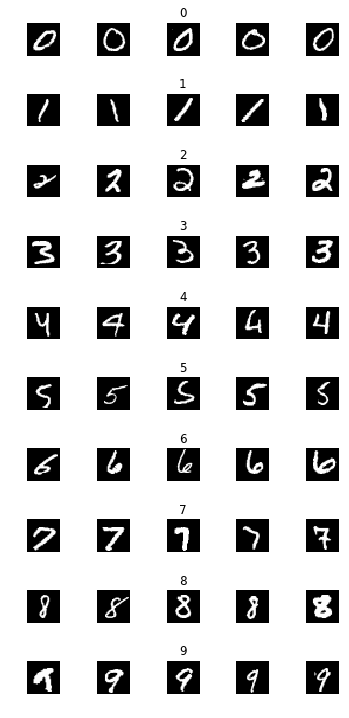

In [4]:
num_of_samples = []
cols=5
num_classes =10
fig,axs = plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train ==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:],cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

<BarContainer object of 10 artists>

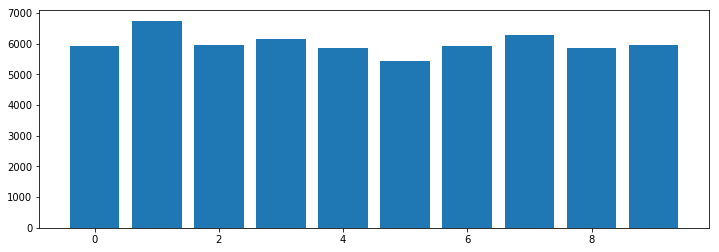

In [5]:
num_of_samples
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)

In [6]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)


In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)
X_test.shape

(10000, 784)

In [9]:
def create_model():
    model = Sequential()
    model.add(Dense(10,input_dim=num_pixels,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [10]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
h = model.fit(X_train,y_train,validation_split=0.1,epochs=30,
          batch_size=200,verbose=1,shuffle=1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 4s 74us/step - loss: 0.4694 - acc: 0.8539 - val_loss: 0.2597 - val_acc: 0.9228
Epoch 2/30
54000/54000 [==============================] - 2s 32us/step - loss: 0.2722 - acc: 0.9195 - val_loss: 0.2417 - val_acc: 0.9270
Epoch 3/30
54000/54000 [==============================] - 2s 31us/step - loss: 0.2420 - acc: 0.9275 - val_loss: 0.1995 - val_acc: 0.9430
Epoch 4/30
54000/54000 [==============================] - 2s 30us/step - loss: 0.2186 - acc: 0.9333 - val_loss: 0.1739 - val_acc: 0.9508
Epoch 5/30
54000/54000 [==============================] - 2s 31us/step - loss: 0.2085 - acc: 0.9373 - val_loss: 0.1724 - val_acc: 0.9515
Epoch 6/30
54000/54000 [==============================] - 2s 31us/step - loss: 0.1960 - acc: 0.9413 - val_loss: 0.1883 - val_acc: 0.9465
Epoch 7/30
54000/54000 [==============================] - 2s 29us/step - loss: 0.1888 - acc: 0.9427 - val_loss: 0.1687 - val_acc:

Text(0.5,1,'Loss')

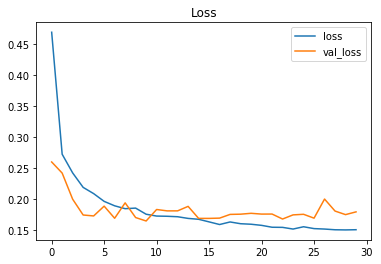

In [12]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')


Text(0.5,1,'Loss')

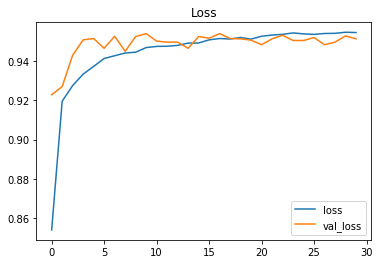

In [13]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['loss','val_loss'])
plt.title('Loss')

In [14]:
score = model.evaluate(X_test,y_test,verbose=0)
score

[0.21205711368694902, 0.939]

<Response [200]>


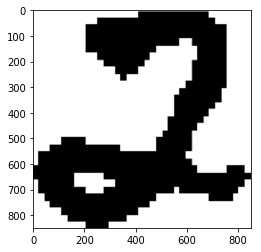

In [15]:
import requests 
from PIL import Image 
url='https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response=requests.get(url,stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)


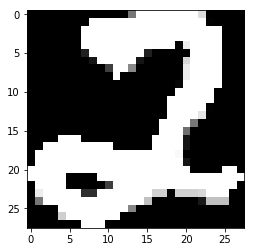

In [16]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array,(28,28))
gray_scale=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image,cmap=plt.get_cmap("gray"))


In [17]:
image = image/255
image = image.reshape(1,784)


In [18]:
prediction = model.predict_classes(image)
prediction

array([2])

# using a cnn model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist



/home/rj/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [4]:
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D


In [5]:
from keras.models import Model

In [6]:
np.random.seed(0)

In [7]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [9]:
print(X_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


In [10]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

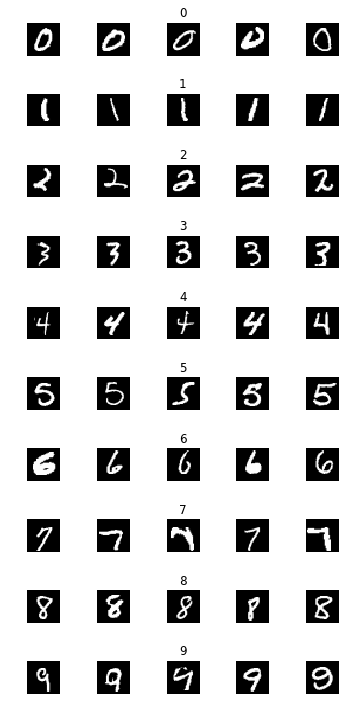

In [13]:
num_of_samples = []
cols=5
num_classes =10
fig,axs = plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected)-1)),:,:]
                                   ,cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


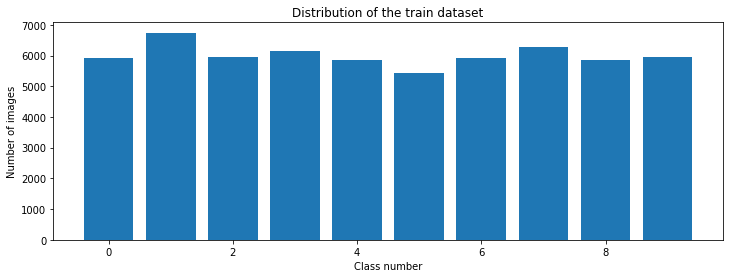

In [14]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

In [15]:
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(15,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(500,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))
    
    model.compile(Adam(lr=0.01),loss='categorical_crossentropy'
                  ,metrics=['accuracy'])
    return model

In [16]:
model = leNet_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

In [17]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.1
                    ,batch_size=100,verbose=1,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 63s 1ms/step - loss: 0.1692 - acc: 0.9469 - val_loss: 0.0643 - val_acc: 0.9790
Epoch 2/10
54000/54000 [==============================] - 59s 1ms/step - loss: 0.1027 - acc: 0.9700 - val_loss: 0.0502 - val_acc: 0.9843
Epoch 3/10
54000/54000 [==============================] - 60s 1ms/step - loss: 0.0961 - acc: 0.9733 - val_loss: 0.0499 - val_acc: 0.9852
Epoch 4/10
54000/54000 [==============================] - 60s 1ms/step - loss: 0.0885 - acc: 0.9754 - val_loss: 0.0625 - val_acc: 0.9847
Epoch 5/10
54000/54000 [==============================] - 61s 1ms/step - loss: 0.0950 - acc: 0.9745 - val_loss: 0.0729 - val_acc: 0.9837
Epoch 6/10
54000/54000 [==============================] - 58s 1ms/step - loss: 0.0938 - acc: 0.9754 - val_loss: 0.0742 - val_acc: 0.9797
Epoch 7/10
54000/54000 [==============================] - 58s 1ms/step - loss: 0.0910 - acc: 0.9761 - val_loss: 0.0609 - val_acc:

Text(0.5,0,'epoch')

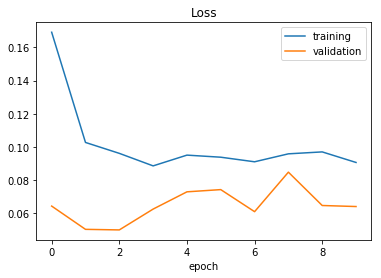

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

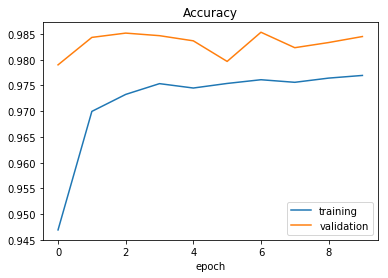

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [20]:
score = model.evaluate(X_test, y_test, verbose=0)

In [21]:
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.07522801629412948
Test accuracy: 0.984


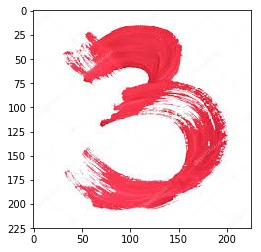

In [22]:
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'

r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

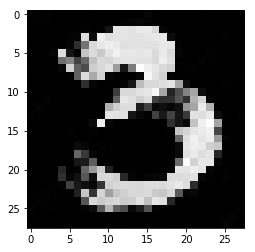

In [23]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [24]:
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)

(1, 28, 28, 1)


In [25]:
print(img.shape)
print("predicted digit: "+str(model.predict_classes(img)))

(1, 28, 28, 1)
predicted digit: [3]


In [26]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

In [27]:
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)


In [28]:
print(visual_layer1.shape)
print(visual_layer2.shape)


(1, 24, 24, 30)
(1, 10, 10, 15)


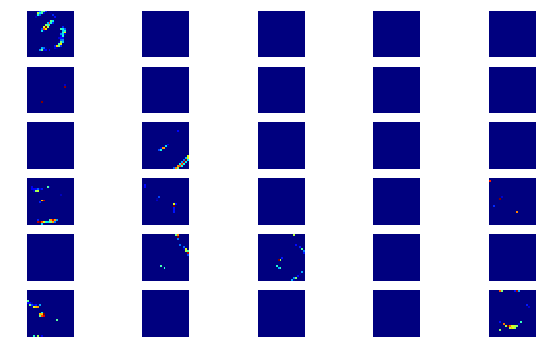

In [29]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

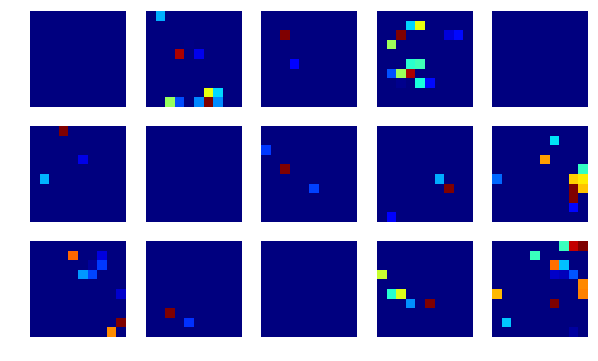

In [30]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')